In [ ]:
"""
Linear Regression Example

Implement Linear Regression for Beijing House Price Problem
"""

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from matplotlib.animation import FuncAnimation
import re

In [2]:
"""
Part-01: Linear Regression
"""

housing_price = load_boston()
dataframe = pd.DataFrame(housing_price['data'])
dataframe.columns = housing_price['feature_names']
dataframe['price'] = housing_price['target']

# sns.heatmap(dataframe.corr(), annot=True, fmt='.1f')
# plt.show()

print(dataframe.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')


In [3]:
rm = dataframe['RM']
lst = dataframe['LSTAT']
target = dataframe['price']

In [4]:
def model(x, w, b):
    return np.dot(x, w.T) + b


def loss(yhat, y):
    return np.mean( (yhat - y) ** 2)


def partial_w(x1, x2, y, yhat):
    return np.array([2 *np.mean((yhat - y) * x1), 2 * np.mean((yhat - y)  * x2)])


def partial_b(x1, x2, y, yhat):
    return 2 * np.mean((yhat - y))

In [5]:
w = np.random.random_sample((1, 2))
print(w)
b = 0
alpha = 1e-5

epoch = 200
history = []

history_k_b_loss = []

[[0.76646144 0.3095512 ]]


In [6]:
for e in range(epoch):
    losses = []
    for batch in range(len(rm)):
        random_index = random.choice(range(len(rm)))

        x1, x2 = rm[random_index], lst[random_index]
        y = target[random_index]

        yhat = model(np.array([x1, x2]), w, b)
        loss_v = loss(yhat, y)

        w = w - partial_w(x1, x2, y, yhat) * alpha
        b = b - partial_b(x1, x2, y, yhat) * alpha

        losses.append(loss_v)

        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss: {}'.format(e, batch, np.mean(losses)))

    history.append(np.mean(losses))

Epoch: 0, Batch: 0, loss: 151.86271856102778
Epoch: 0, Batch: 100, loss: 263.5872813250959
Epoch: 0, Batch: 200, loss: 251.738169143727
Epoch: 0, Batch: 300, loss: 265.0873434683313
Epoch: 0, Batch: 400, loss: 246.81922554270534
Epoch: 0, Batch: 500, loss: 235.3032255992267
Epoch: 1, Batch: 0, loss: 19.57790198635195
Epoch: 1, Batch: 100, loss: 159.31380412508983
Epoch: 1, Batch: 200, loss: 149.39271607684955
Epoch: 1, Batch: 300, loss: 166.24008703389129
Epoch: 1, Batch: 400, loss: 160.65535981907715
Epoch: 1, Batch: 500, loss: 159.46308073670542
Epoch: 2, Batch: 0, loss: 218.59722447423346
Epoch: 2, Batch: 100, loss: 136.07201691576378
Epoch: 2, Batch: 200, loss: 161.51368122041697
Epoch: 2, Batch: 300, loss: 159.4969141796809
Epoch: 2, Batch: 400, loss: 146.21689426224953
Epoch: 2, Batch: 500, loss: 138.22587212292893
Epoch: 3, Batch: 0, loss: 69.70191445306189
Epoch: 3, Batch: 100, loss: 116.16786760488094
Epoch: 3, Batch: 200, loss: 119.71565030867042
Epoch: 3, Batch: 300, loss: 1

In [7]:
# Logstic Regression

In [8]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from matplotlib.animation import FuncAnimation
import re

In [9]:

housing_price = load_boston()
dataframe = pd.DataFrame(housing_price['data'])
dataframe.columns = housing_price['feature_names']
dataframe['price'] = housing_price['target']

rm = dataframe['RM']
lst = dataframe['LSTAT']
price = dataframe['price']
print(np.percentile(price, 66))

23.53


In [10]:
# plt.hist(target)
# plt.show()

In [11]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > np.percentile(price, 66)))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [12]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)


def loss(yhat, y):
    return -1 * np.sum(y*np.log(yhat) + (1 - y) * np.log(1 - yhat))


def partial_w(x1, x2, y, yhat):
    return np.array([np.sum((yhat - y) * x1), np.sum((yhat - y) * x2)])


def partial_b(x1, x2, y, yhat):
    return np.sum(yhat - y)

In [13]:
w = np.random.random_sample((1, 2))
print(w)
b = 0
alpha = 1e-5

epoch = 200
history = []

history_k_b_loss = []

[[0.69565948 0.90768813]]


In [14]:
for e in range(epoch):
    losses = []
    for batch in range(len(rm)):
        random_index = random.choice(range(len(rm)))

        x1, x2 = rm[random_index], lst[random_index]
        y = expensive[random_index]

        yhat = model(np.array([x1, x2]), w, b)
        loss_v = loss(yhat, y)

        w = w - partial_w(x1, x2, y, yhat) * alpha
        b = b - partial_b(x1, x2, y, yhat) * alpha

        losses.append(loss_v)

        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss: {}'.format(e, batch, np.mean(losses)))

    history.append(np.mean(losses))

Epoch: 0, Batch: 0, loss: 3.14765267665445e-06
Epoch: 0, Batch: 100, loss: 13.555508645878497
Epoch: 0, Batch: 200, loss: 11.83709021684691
Epoch: 0, Batch: 300, loss: 11.738465997702518
Epoch: 0, Batch: 400, loss: 11.935773254362111
Epoch: 0, Batch: 500, loss: 11.920971659114693
Epoch: 1, Batch: 0, loss: 9.491595103632969
Epoch: 1, Batch: 100, loss: 11.607244608288832
Epoch: 1, Batch: 200, loss: 12.0667577594433
Epoch: 1, Batch: 300, loss: 11.572571737367278
Epoch: 1, Batch: 400, loss: 11.579775065015916
Epoch: 1, Batch: 500, loss: 11.692493156104222
Epoch: 2, Batch: 0, loss: 0.0002565112564880696
Epoch: 2, Batch: 100, loss: 10.82601935494795
Epoch: 2, Batch: 200, loss: 10.288777212104227
Epoch: 2, Batch: 300, loss: 10.525115134161169
Epoch: 2, Batch: 400, loss: 10.478520186471238
Epoch: 2, Batch: 500, loss: 10.468264440938869
Epoch: 3, Batch: 0, loss: 16.033642480271318
Epoch: 3, Batch: 100, loss: 9.955363813982737
Epoch: 3, Batch: 200, loss: 9.979613145136888
Epoch: 3, Batch: 300, l

In [15]:
predicated = [model(np.array([x1, x2]), w, b) for x1, x2 in zip(rm, lst)]
true = expensive

In [16]:
def accuracy(y, yhat):
    return sum(1 if i == j else 0 for i, j in zip(y, yhat)) / len(y)

In [17]:
print(accuracy(true, predicated))

# decision boundary

0.0


In [18]:
"""
Linear Regression: 实现了回归，其中包括线性函数的定义，为什么要用线性函数，loss的意义，梯度下降的意义，stochastic gradient descent
Use Boston house price dataset.
北京2020年房价的数据集，为什么我没有用北京房价的数据集呢？
Boston: room size, subway, highway, crime rate 有一个比较明显的关系，所以就观察关系比较容易
北京的房价：！远近，！房况 ==》 学区！！！！ => 非常贵 海淀区
"""

'\nLinear Regression: 实现了回归，其中包括线性函数的定义，为什么要用线性函数，loss的意义，梯度下降的意义，stochastic gradient descent\nUse Boston house price dataset.\n北京2020年房价的数据集，为什么我没有用北京房价的数据集呢？\nBoston: room size, subway, highway, crime rate 有一个比较明显的关系，所以就观察关系比较容易\n北京的房价：！远近，！房况 ==》 学区！！！！ => 非常贵 海淀区\n'

In [19]:
import random

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [20]:
"""
为什么我没有一行一行解释代码
为什么我没有注释

==> 好的Python代码 一定是"自解释(self description)"
"""

'\n为什么我没有一行一行解释代码\n为什么我没有注释\n\n==> 好的Python代码 一定是"自解释(self description)"\n'

In [21]:
dataset = load_boston()
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

In [22]:
# print(dataframe.corr()) # show the correlation of dataframe variables
# correlation => 如果一个值的增大，会引起另外一个值一定增大，而且是定比例增大 相关系数就越接近于1
# correlation => 0 就是两者之间没有任何关系
# correlation => -1 一个值增大 另外一个值一定减小 而且减小是成相等比例的

# sns.heatmap(dataframe.corr())
# plt.show()

# RM：小区平均的卧室个数
# LSTAT: 低收入人群在周围的比例

rm = dataframe['RM']
lstat = dataframe['LSTAT']


In [23]:
def linear(x, w, b):
    # vectorized model
    return np.dot(x, w.T) + b


def loss(yhat, y):
    # numpy broadcast numpy广播方法
    return np.mean( (yhat - y) ** 2)


def partial_w(x, y, yhat):
    return np.array([2 * np.mean((yhat - y) * x[0]), 2 * np.mean((yhat - y) * x[1])])


def partial_b(x, y, yhat):
    return 2 * np.mean((yhat - y))


def optimize(w, b, x, y, yhat, pw, pb, learning_rate):
    w = w + -1 * pw(x, y, yhat) * learning_rate
    b = b + -1 * pb(x, y, yhat) * learning_rate

    return w, b

In [24]:
def train(model_to_be_train, target, loss, pw, pb):

    w = np.random.random_sample((1, 2)) # w normal
    b = np.random.random() # 0 深度学习的时候会和大家详细解释
    learning_rate = 1e-5
    epoch = 200
    losses = []

    for i in range(epoch):
        batch_loss = []
        for batch in range(len(rm)):
            # batch training
            index = random.choice(range(len(rm)))
            rm_x, lstat_x = rm[index], lstat[index]
            x = np.array([rm_x, lstat_x])
            y = target[index]

            yhat = model_to_be_train(x, w, b)
            loss_v = loss(yhat, y)

            batch_loss.append(loss_v)

            w, b = optimize(w, b, x, y, yhat, pw, pb, learning_rate)

            if batch % 100 == 0:
                print('Epoch: {} Batch: {}, loss: {}'.format(i, batch, loss_v))
        losses.append(np.mean(batch_loss))

    return model_to_be_train, w, b, losses

Epoch: 0 Batch: 0, loss: 165.0318036522631
Epoch: 0 Batch: 100, loss: 1936.2111196826459
Epoch: 0 Batch: 200, loss: 87.98685416771973
Epoch: 0 Batch: 300, loss: 30.661954019864307
Epoch: 0 Batch: 400, loss: 202.03139655964674
Epoch: 0 Batch: 500, loss: 17.580267736634838
Epoch: 1 Batch: 0, loss: 1446.1253865700296
Epoch: 1 Batch: 100, loss: 1.5047965030815005
Epoch: 1 Batch: 200, loss: 154.92310608521424
Epoch: 1 Batch: 300, loss: 31.418267059890848
Epoch: 1 Batch: 400, loss: 60.12302874669766
Epoch: 1 Batch: 500, loss: 0.017649206948686953
Epoch: 2 Batch: 0, loss: 1042.8976252299444
Epoch: 2 Batch: 100, loss: 22.805604762686905
Epoch: 2 Batch: 200, loss: 17.571935057777385
Epoch: 2 Batch: 300, loss: 24.85551059275261
Epoch: 2 Batch: 400, loss: 59.53967707873719
Epoch: 2 Batch: 500, loss: 5.696399894817007
Epoch: 3 Batch: 0, loss: 8.513585740753195
Epoch: 3 Batch: 100, loss: 398.7638929121661
Epoch: 3 Batch: 200, loss: 200.7024045227773
Epoch: 3 Batch: 300, loss: 33.54234520380767
Epoc

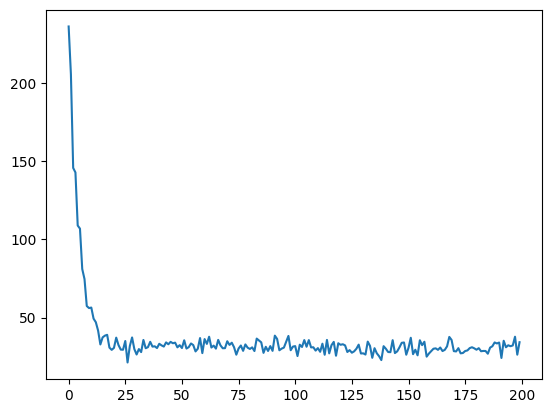

In [25]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    target = dataframe['price']

    model, w, b, losses = train(linear, target, loss, partial_w, partial_b)
    plt.plot(losses)
    predicate = model(np.array([19, 7]), w, b)
    print(predicate)

    plt.show()

In [26]:
# Logstic Regression

In [27]:
"""
Linear Regression: 实现了回归，其中包括线性函数的定义，为什么要用线性函数，loss的意义，梯度下降的意义，stochastic gradient descent
Use Boston house price dataset.
北京2020年房价的数据集，为什么我没有用北京房价的数据集呢？
Boston: room size, subway, highway, crime rate 有一个比较明显的关系，所以就观察关系比较容易
北京的房价：！远近，！房况 ==》 学区！！！！ => 非常贵 海淀区
Harder than deep learning:
    1. compiler
    2. programming language & automata
    3. computer graphic
    4. complexity system
    5. computing complexity
    6. operating system
"""

'\nLinear Regression: 实现了回归，其中包括线性函数的定义，为什么要用线性函数，loss的意义，梯度下降的意义，stochastic gradient descent\nUse Boston house price dataset.\n北京2020年房价的数据集，为什么我没有用北京房价的数据集呢？\nBoston: room size, subway, highway, crime rate 有一个比较明显的关系，所以就观察关系比较容易\n北京的房价：！远近，！房况 ==》 学区！！！！ => 非常贵 海淀区\nHarder than deep learning:\n    1. compiler\n    2. programming language & automata\n    3. computer graphic\n    4. complexity system\n    5. computing complexity\n    6. operating system\n'

In [29]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [30]:
dataset = load_boston()
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

# print(dataframe.corr()) # show the correlation of dataframe variables
# correlation => 如果一个值的增大，会引起另外一个值一定增大，而且是定比例增大 相关系数就越接近于1
# correlation => 0 就是两者之间没有任何关系
# correlation => -1 一个值增大 另外一个值一定减小 而且减小是成相等比例的

# sns.heatmap(dataframe.corr())
# plt.show()

# RM：小区平均的卧室个数
# LSTAT: 低收入人群在周围的比例

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']
greater_then_most = np.percentile(price, 66)
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
target = dataframe['expensive']

print(dataframe[:20])

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

In [31]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def model(x, w, b):
    return sigmoid(np.dot(x, w.T) + b)


def loss(yhat, y):
    return -np.sum(y*np.log(yhat) + (1 - y)*np.log(1 - yhat))


def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])


def partial_b(x, y, yhat):
    return np.sum((yhat - y))

In [32]:

model, w, b, losses = train(model, target,loss, partial_w, partial_b)

random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5

Epoch: 0 Batch: 0, loss: 5.380792320433632
Epoch: 0 Batch: 100, loss: 4.821708458450062
Epoch: 0 Batch: 200, loss: 0.009970051372436815
Epoch: 0 Batch: 300, loss: 0.007276578288854888
Epoch: 0 Batch: 400, loss: 0.008371349455533252
Epoch: 0 Batch: 500, loss: 4.439392817690861
Epoch: 1 Batch: 0, loss: 0.0057417844585807625
Epoch: 1 Batch: 100, loss: 4.0672693147995975
Epoch: 1 Batch: 200, loss: 4.3388231170015805
Epoch: 1 Batch: 300, loss: 3.9678430939219997
Epoch: 1 Batch: 400, loss: 3.8457306703880336
Epoch: 1 Batch: 500, loss: 0.018338303952971355
Epoch: 2 Batch: 0, loss: 3.420840235954716
Epoch: 2 Batch: 100, loss: 0.03059785100883833
Epoch: 2 Batch: 200, loss: 0.01311801914872309
Epoch: 2 Batch: 300, loss: 3.20868533902604
Epoch: 2 Batch: 400, loss: 0.01855035024291908
Epoch: 2 Batch: 500, loss: 0.028177909778007017
Epoch: 3 Batch: 0, loss: 3.5804308101600375
Epoch: 3 Batch: 100, loss: 2.708057456536129
Epoch: 3 Batch: 200, loss: 3.0363565059324196
Epoch: 3 Batch: 300, loss: 1.8667

In [33]:
for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], target[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM: {}, LSTAT: {}, EXPENSIVE: {}, Predicated: {}'.format(x1, x2, y, predicate_label))

RM: 5.701, LSTAT: 18.35, EXPENSIVE: 0, Predicated: 0
RM: 4.973, LSTAT: 12.64, EXPENSIVE: 0, Predicated: 0
RM: 5.79, LSTAT: 15.84, EXPENSIVE: 0, Predicated: 0
RM: 6.416, LSTAT: 9.04, EXPENSIVE: 1, Predicated: 0
RM: 4.963, LSTAT: 14.0, EXPENSIVE: 0, Predicated: 0
RM: 6.619, LSTAT: 7.22, EXPENSIVE: 1, Predicated: 1
RM: 5.987, LSTAT: 26.77, EXPENSIVE: 0, Predicated: 0
RM: 6.065, LSTAT: 5.52, EXPENSIVE: 0, Predicated: 1
RM: 6.642, LSTAT: 9.69, EXPENSIVE: 1, Predicated: 0
RM: 7.489, LSTAT: 1.73, EXPENSIVE: 1, Predicated: 1
RM: 7.416, LSTAT: 6.19, EXPENSIVE: 1, Predicated: 1
RM: 6.393, LSTAT: 5.19, EXPENSIVE: 1, Predicated: 1
RM: 5.565, LSTAT: 17.16, EXPENSIVE: 0, Predicated: 0
RM: 7.024, LSTAT: 1.98, EXPENSIVE: 1, Predicated: 1
RM: 5.88, LSTAT: 12.03, EXPENSIVE: 0, Predicated: 0
RM: 6.404, LSTAT: 20.31, EXPENSIVE: 0, Predicated: 0
RM: 6.003, LSTAT: 21.32, EXPENSIVE: 0, Predicated: 0
RM: 5.709, LSTAT: 15.79, EXPENSIVE: 0, Predicated: 0
RM: 6.957, LSTAT: 3.53, EXPENSIVE: 1, Predicated: 1
RM: 7

In [34]:

# 剩下一件事情，就是要检查我们这个模型的准确度到底如何！！
"""
如何衡量模型的好坏：
1. accuracy 准确度
2. precision 精确度
3. recall 召回率
4. f1, f2 score
5. AUC-ROC 曲线
引出一个非常非常重要的概念： =》 过拟合 和 欠拟合 （over-fitting and under-fitting）
整个机器学习的过程，就是在不断的进行过拟合和欠拟合的调整！
"""

'\n如何衡量模型的好坏：\n1. accuracy 准确度\n2. precision 精确度\n3. recall 召回率\n4. f1, f2 score\n5. AUC-ROC 曲线\n引出一个非常非常重要的概念： =》 过拟合 和 欠拟合 （over-fitting and under-fitting）\n整个机器学习的过程，就是在不断的进行过拟合和欠拟合的调整！\n'